In [691]:
from IPython.display import display, Math
import sympy as sp
from sympy.parsing.sympy_parser import parse_expr
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import sympy.plotting as pls
import seaborn as sns
import numpy as np
import math as mt

# PUNTO 1

Escriba un polinomio p(x) tal que |sinc(x) − p(x)| ≤ 10^10 para −0.2 ≤ x ≤ 0.2, donde:
$$
f(x)= \left\{ \begin{array}{lcc}
             \frac{sin(x)}x &   si  &  x\neq 0 \\
             \\ 1 &  si  & x =  0
             \end{array}
   \right.
$$
es la función ”sinc” (usada en procesamiento de señales, etc). Muestre ademas que su polinomio p cumple la condición |sinc(x) − p(x)| ≤ 10^-10 para x ∈ [−0.2, 0.2], grafique los errores teoricos y reales.

In [692]:
x = sp.symbols("x")  # creamos la variable x
sinc = sp.sin(x)/x  # asignamos la funcion

x0 = 0   # punto de expansion
n = 6    # numero de polinomio

In [693]:
p = sp.series(expr = sinc, x=x , x0=x0, n=n)   # genera la serie de taylor
display(Math(sp.latex(p)))   # muestra la serie en formato latex

<IPython.core.display.Math object>

In [694]:
max_n = 9
p = [sp.series(expr=sinc, x=x, x0=x0, n=ni).removeO() for ni in range(2,max_n)]

### Cota del error

$|f(0.2)-P_n(0.2)| = \frac{\frac{sin(c)}c*0.2^(n+1)}{(n+1)!}\leq \frac{0.2}{(n+1)!}$

Para $c\in(0,0.2)$

In [695]:
n_pol = len(p)   # tamaño del polinomio a utilizar
pol_deg = np.arange(1,n_pol+1)  # cea una lista hasta el polinomi a utilizar

error_teoric = [1.1*(0.2)**(n+1)/(mt.factorial(n+1)) for n in pol_deg]   # error estimado con lagrange
print("valores teroricos: ")
for i, element in enumerate(error_teoric):
  if i == 0:
    continue
  print(f"el valor estimado de grado {i} es: {element}")
print("------------------------------------------------------")


f_eval = sinc.subs(x,0.2).evalf() # intercambia valores de x en la funcion
error_experiment = []
for n in range(n_pol):
  p_n = p[n]
  p_eval = p_n.subs(x,0.2).evalf()   # intercambia valores de x en los polinomios
  error_experiment.append(np.abs(float(f_eval-p_eval)))  # error experimental añadiendo a la lista

print("valores reales: ")
for i, element in enumerate(error_experiment):
  if i == 0:
    continue
  print(f"el valor real de grado {i} es: {element}")

valores teroricos: 
el valor estimado de grado 1 es: 0.0014666666666666671
el valor estimado de grado 2 es: 7.333333333333336e-05
el valor estimado de grado 3 es: 2.933333333333334e-06
el valor estimado de grado 4 es: 9.777777777777782e-08
el valor estimado de grado 5 es: 2.793650793650795e-09
el valor estimado de grado 6 es: 6.984126984126988e-11
------------------------------------------------------
valores reales: 
el valor real de grado 1 es: 1.3320641972791591e-05
el valor real de grado 2 es: 1.3320641972791591e-05
el valor real de grado 3 es: 1.2691360518068961e-08
el valor real de grado 4 es: 1.2691360518068961e-08
el valor real de grado 5 es: 7.052136652418994e-12
el valor real de grado 6 es: 7.052136652418994e-12


#### Graficas

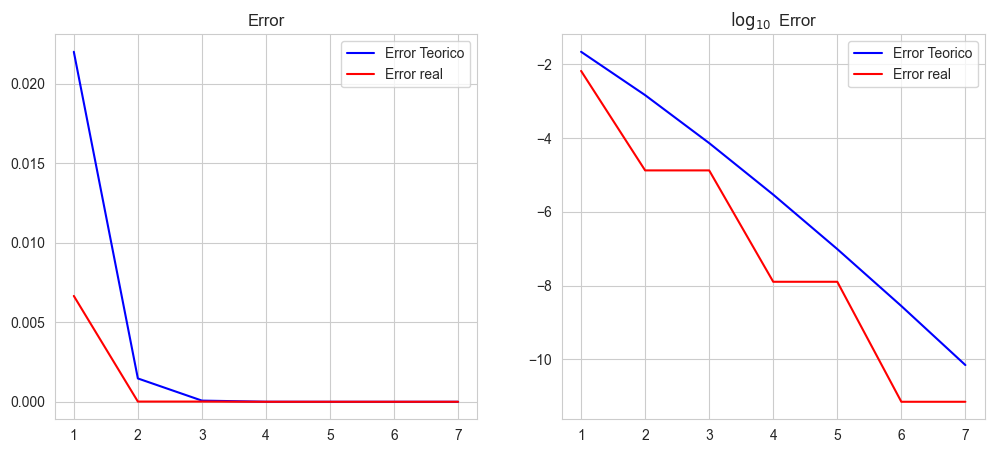

In [696]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.plot(pol_deg,error_teoric,color='b')
ax1.plot(pol_deg,error_experiment, color ='r')
ax1.set_title('Error')
ax1.legend(['Error Teorico', 'Error real'], prop={'size':10})

ax2.plot(pol_deg,np.log10(error_teoric),color='b')
ax2.plot(pol_deg,np.log10(error_experiment), color = 'r')
ax2.set_title('$\log_{10}$ Error')
ax2.legend(['Error Teorico', 'Error real'], prop={'size':10});

# PUNTO 2
Halle las fórmulas de diferencias progresivas, regresivas y centrales para cualquier f ∈ C4[a, b] tal que para x0 ∈ (a,b) se tenga O(h^3). Luego, considere f(x) = xln(x) y calcule f′(1) para distintos valores de h, grafique los errores e indique qué valor de h minimiza el error.

In [697]:
x, h = sp.symbols('x h')
f = sp.Function('f')(x+h)

In [698]:
sp.diff(f)

ValueError: 
Since there is more than one variable in the expression, the
variable(s) of differentiation must be supplied to differentiate f(h +
x)

In [ ]:
display(Math("Df_{{progresiva}}(x) = {}".format(sp.latex(df_progresiva.simplify()))))
display(Math("Df_{{progresiva}}^{{(2)}}(x) = {}".format(sp.latex(df_progresiva2.simplify()))))
display(Math("Df_{{progresiva}}^{{(3)}}(x) = {}".format(sp.latex(df_progresiva3.simplify()))))
display(Math("Df_{{regresiva}}(x) = {}".format(sp.latex(df_regresiva.simplify()))))
display(Math("Df_{{regresiva}}^{{(2)}}(x) = {}".format(sp.latex(df_regresiva2.simplify()))))
display(Math("Df_{{regresiva}}^{{(3)}}(x) = {}".format(sp.latex(df_regresiva3.simplify()))))
display(Math("Df_{{central}}(x) = {}".format(sp.latex(df_central.simplify()))))
display(Math("Df_{{central}}^{{(2)}}(x) = {}".format(sp.latex(df_central2.simplify()))))
display(Math("Df_{{central}}^{{(3)}}(x) = {}".format(sp.latex(df_central3.simplify()))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# PUNTO 3
Considere la función: $$f(x) = x sin(x)$$ grafique en un solo lienzo a f y los polinomios de Taylor
de grado n = 1,2,...,6 para: x0∈(−5π,5π).

In [ ]:
x0 = 0
n = 6

x_sinx = x*sp.sin(x)

In [ ]:
p = sp.series(expr= x_sinx, x=x, x0=x0, n=n)
display(Math(sp.latex(p)))

<IPython.core.display.Math object>

In [ ]:
max_n = 10
p = [sp.series(expr = x_sinx, x0=x0, n=n).removeO() for n in range(4,max_n)]
p_latex = [sp.latex(pol) for pol in p]
distLatex = [display(Math(q)) for q in p_latex]
n_pol = len(p)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

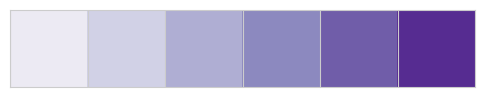

In [ ]:
sns.set_style('whitegrid')
cmap = sns.color_palette('Purples', n_pol)
sns.palplot(cmap)

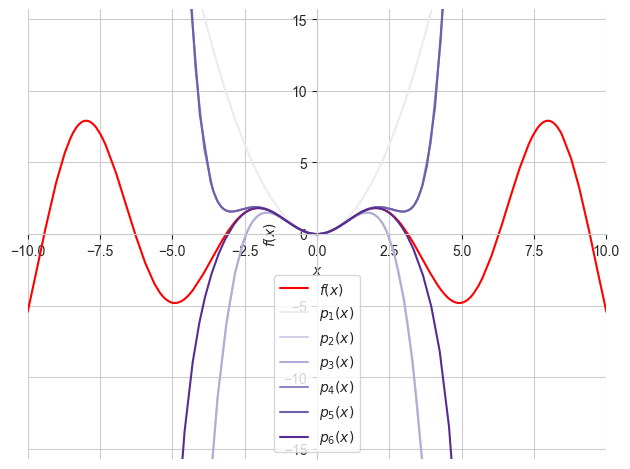

In [ ]:
fig = pls.plot(x_sinx,xlim=[-10,10],ylim=[-5*np.pi,5*np.pi], line_color='r', show=False)
labs = ['$f(x)$']
for n in range(n_pol):
  c = cmap[n]
  labs.append(f'$p_{n+1}(x)$')
  fig.extend(pls.plot(p[n],xlim=[-10,10],ylim=[-5*np.pi,5*np.pi], line_color=c, show=False))
for n in range(n_pol+1): fig[n].label = labs[n]
fig.legend = True
fig.show()